In [1]:
import cv2
import numpy as np
import scipy.io as sio
import utils
from camera import Camera
import player

In [2]:
extrinsic_data = '../data/Calib/Extrinsics_PG1.npz'
camera_data = '../data/Calib/cameraParams_PG1.npz'
motion_capture_data = '../data/AMASS/F_amass_Subject_1.mat'
movement_number = 1


camera = player.read_camera_params(extrinsic_data, camera_data)
motion_capture = player.read_motion_capture_data(motion_capture_data, movement_number)

In [3]:
camera

Camera(rotation_matrix=array([[ 0.0305191 ,  0.06318672, -0.99753497],
       [ 0.99942183,  0.01303452,  0.03140247],
       [ 0.01498661, -0.9979166 , -0.06275239]]), translation_vector=array([-177.23154422, 1030.55751095, 4999.31781498]), intrinsic_matrix=array([[979.17889011,   0.        ,   0.        ],
       [  0.        , 978.10179305,   0.        ],
       [408.0273103 , 291.16967878,   1.        ]]))

In [4]:
image_points = utils.adapt_motion_data_for_video(motion_capture, camera)

In [5]:
image_points.shape

(146, 52, 2)

In [6]:
motion_capture = utils.reduce_motion_data_frame_rate(motion_capture)

In [7]:
motion_capture.shape

(146, 52, 3)

In [12]:
x = motion_capture[0, :, 0]
y = motion_capture[0, :, 1]
z = motion_capture[0, :, 2]
x

array([373.28643049, 353.75470365, 365.54407025, 328.66293634,
       330.95263387, 328.19362427, 356.74265469, 319.54047526,
       308.13302542, 362.90716077, 428.9891019 , 433.85364557,
       345.51875735, 360.98121549, 338.83221889, 406.26334096,
       359.42469979, 321.56904484, 341.67044307, 298.44724084,
       429.40514232, 402.4589553 , 460.27712966, 459.7809806 ,
       442.80846859, 450.95576788, 442.87954713, 424.73815823,
       414.67090393, 404.61411024, 391.80501247, 432.13938619,
       425.03335024, 408.48248149, 438.43131209, 439.00384451,
       445.1492324 , 455.61655308, 461.64451981, 449.94278694,
       441.49490143, 439.95632673, 427.98252846, 394.92582227,
       388.5920241 , 381.094028  , 416.42712499, 415.90221668,
       405.30799771, 429.23064972, 437.15028907, 447.49312545])

<IPython.core.display.Javascript object>


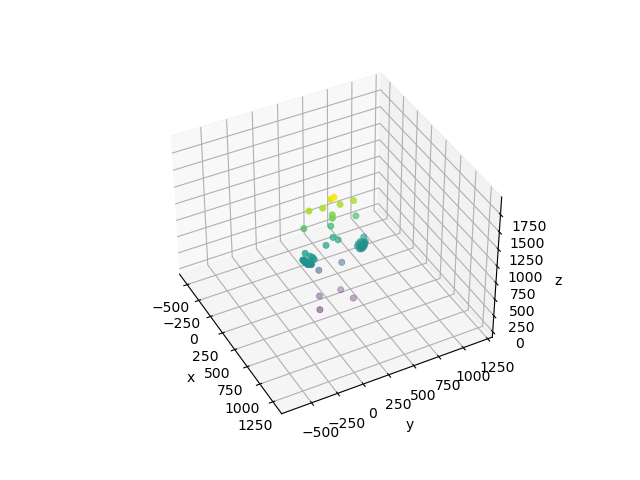

1000
373.2864304863714


In [53]:
from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


r = 1 if np.max([x[0], y[0], z[0]]) <= 10 else 1000
print(r)
xroot, yroot, zroot = x[0], y[0], z[0]

print(xroot)
ax.set_xlim3d([-r + xroot, r + xroot])
ax.set_zlim3d([-r + zroot, r + zroot])
ax.set_ylim3d([-r + yroot, r + yroot])


ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);


In [49]:
# ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
# zline = motion_capture[0, 0, 2]
# xline = motion_capture[0, 0, 0]
# yline = motion_capture[0, 0, 1]
# ax.plot3D(xline, yline, zline, 'gray')

# # Data for three-dimensional scattered points
# zdata = 15 * np.random.random(100)
# xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
# ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
# print(xdata)
# ax.scatter3D(x, y, z, c=zdata, cmap='Greens');

In [38]:
plt.zlim()  # return the current ylim

AttributeError: module 'matplotlib.pyplot' has no attribute 'zlim'